<a href="https://colab.research.google.com/github/DaruHashida/MyPyTorch/blob/main/SecondPytorchExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PyTorch Workflow
Let's explore an example PyTorch end-to-end Workflow

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering


{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
#Check Pytorch version

torch.__version__

'2.0.1+cu118'

##1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula:

We'll use a linear regression formuls to make a straight line with *known* **parameters**.

In [ ]:
# Create *known* parameters
weight =  0.7
bias = 0.3

#Create a set of numbers
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
# Create a train/test split

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y [:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in yellow
  plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")

  #Are there predictions?

  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14});


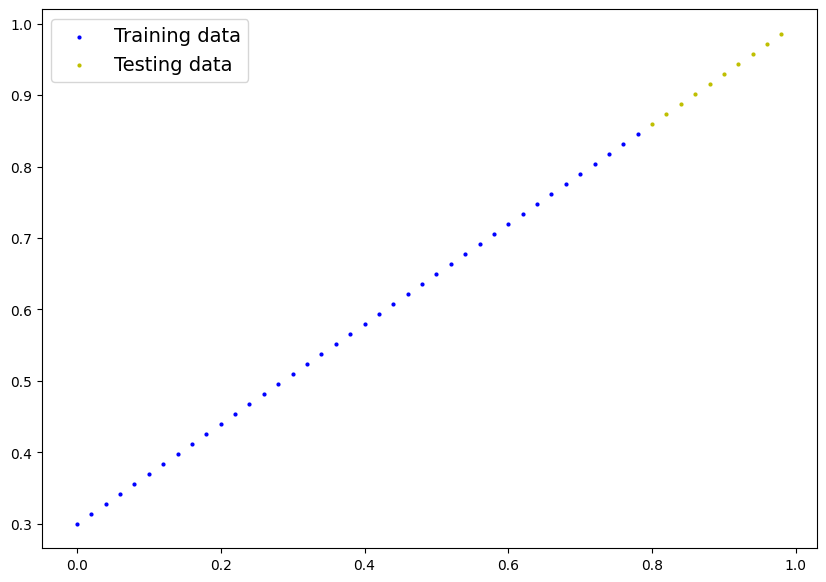

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

Because we're going to be building classes, we should be familiar with OOP in Python: https://realpython.com/pyn=thon3-object-oriented-programming/

What our model does?
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias we used to create the data)

How does it go so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits from nn.Module, building bricks for PyTorch module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #pytorch tracks gradients of this parameter for use in gradient descent
                                            dtype=torch.float))
    self.bias =  nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the test data
    return self.weights * x + self.bias #this is the linear regression formula




### Pytorch model building essentials

* `torch.nn` - building blocks for computational graphs
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - the base class for all nn modules. If you subclass it, you shoul overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - all nn.Module subclasses require me to overwrite forward().

### Checking the contents of our PyTorch module

Nowe we've created a model, let's see what's inside...

So we can check our model parameters or whats inside our model using `.parameters()`.

In [ ]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predicrtions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

# You can also do something similar with torch.no_grad, howewer torch.inference_mode() if prefered
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

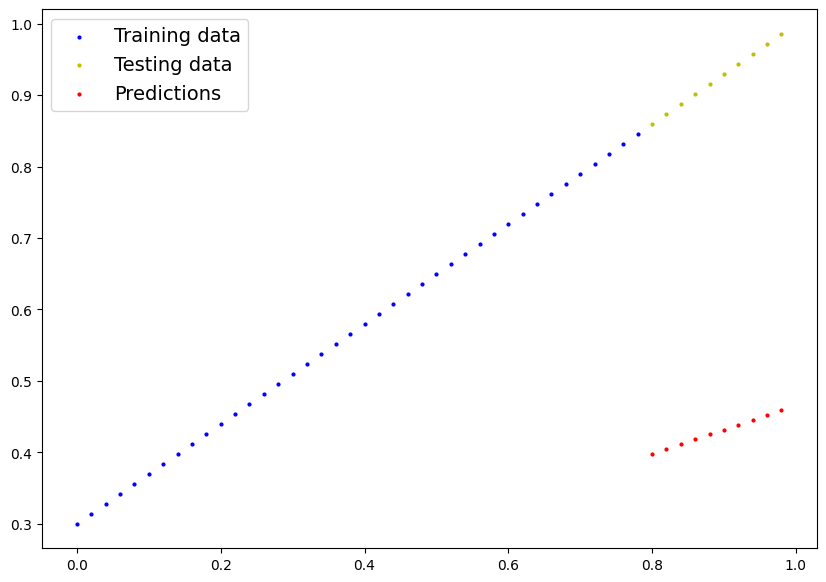

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor represantation of the data to a better trepresentation of the data.

One way to mesure, how wrong your models predictions are is to use a loss function (cost function)

* Note: Loss function may also be called cost function or criterion in different. For our case, we're going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, LOWER IS BETTER.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias)
  * Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with ueach step (smaller `lr` - smaller changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [ ]:
#Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = rearning rate = possibly the most important hyperparameter

###Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (forward propagation,this involves data moving through our `forward()` functions) to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - data goes backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)
#An epoch = one loop through the data
epochs = 200

epoch_count=[]
loss_values=[]
test_loss_values=[]
###Training
#0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #train mode in PyTorch set all peremeters that require gradients to require gradients

  #_1.Forward pass
  y_pred=model_0(X_train)

  #_2.Calculate the loss.
  loss=loss_fn(y_pred, y_train)

  #_3.Optimizer zero grad
  optimizer.zero_grad()

  #_4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #_5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... we have to zero them above in 3-th step for next generation of the loop

  model_0.eval() # turns off gradient settings in the model not needed for evaluation/testing
  with torch.inference_mode():
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)
    loss_value = loss_fn(y_pred, y_train)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss_value)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
# Print out model state_dict()
print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129),
  tensor(0.1977),
  tensor(0.0891),
  tensor(0.0531),
  tensor(0.0454),
  tensor(0.0417),
  tensor(0.0382),
  tensor(0.0348),
  tensor(0.0313),
  tensor(0.0279),
  tensor(0.0245),
  tensor(0.0210),
  tensor(0.0176),
  tensor(0.0142),
  tensor(0.0107),
  tensor(0.0073),
  tensor(0.0039),
  tensor(0.0089),
  tensor(0.0089),
  tensor(0.0089)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

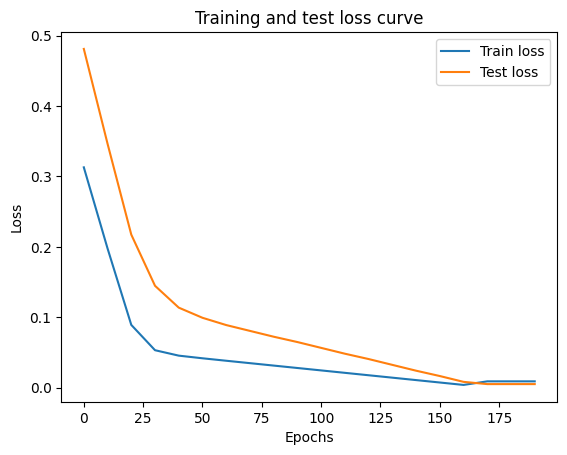

In [ ]:
#Plot the loss curves
plt.plot(epoch_count,loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

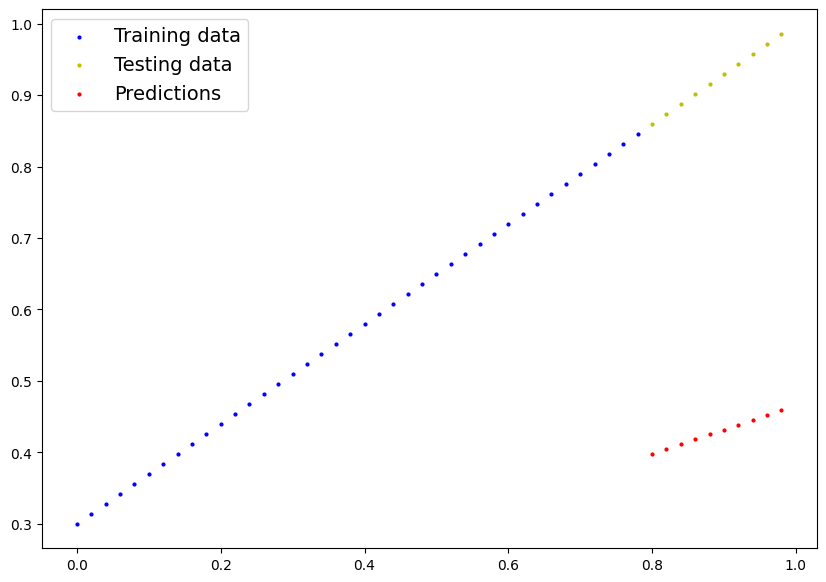

In [ ]:
plot_predictions(predictions=y_preds)

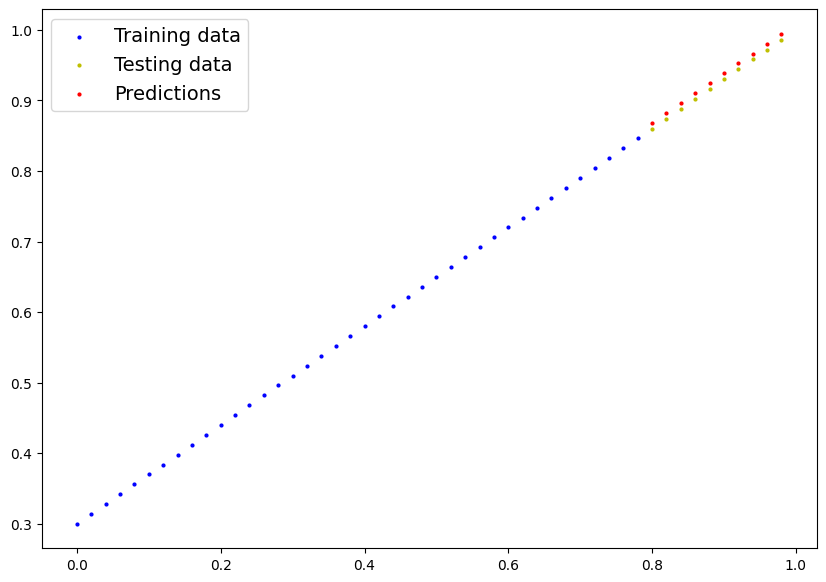

In [ ]:
plot_predictions(predictions=y_preds_new)

##Saving a model in PyTorch

There are three main methods youu should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved
 state dictionary


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Linear_function_prognoser.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/Linear_function_prognoser.pth


In [ ]:
MODEL_NAME1 = "Linear_function_prognoser_full_model.pth"
MODEL_SAVE_PATH1 = MODEL_PATH / MODEL_NAME1

print(f"Saving whole model to: {MODEL_SAVE_PATH1}")
torch.save(obj=model_0,
           f=MODEL_SAVE_PATH1)

Saving whole model to: models/Linear_function_prognoser_full_model.pth


In [ ]:
ls -l models

total 8
-rw-r--r-- 1 root root 1819 Aug 19 11:10 Linear_function_prognoser_full_model.pth
-rw-r--r-- 1 root root 1199 Aug 19 11:10 Linear_function_prognoser.pth


## Loading a PyTorch model

Since we saved our model static rather then the entire model, we'll create a new instancce of our model class and load the saved `state_dict()`into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#To load in a saved state_dicct we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)


In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting all together
Let's go back the through the steps above and see it all in one place.

In [ ]:
#Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code:

This means if we got access to a GPU, our code will use it (for potential faster computing)

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
#Create some data using the linear regression formula of y=weight*x+bias
weight = 0.2
bias = 0.9

In [ ]:
#Create range values
start = 0
end = 1
step = 0.02

#Create x and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9040],
         [0.9080],
         [0.9120],
         [0.9160],
         [0.9200],
         [0.9240],
         [0.9280],
         [0.9320],
         [0.9360]]))

In [ ]:
#Split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

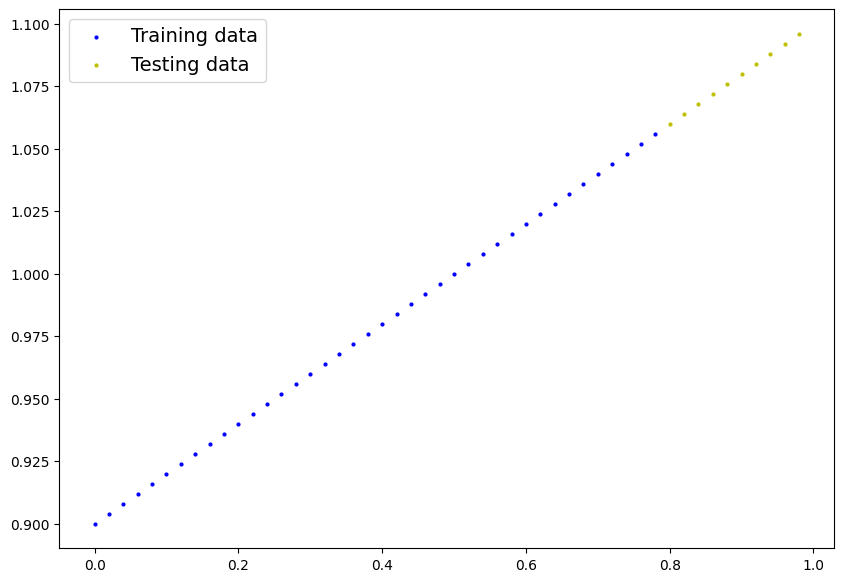

In [ ]:
#Plot the data
#Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu())

### 6.2 Building a PyTorch Linear model

In [ ]:
#Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called:linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                 out_features=1)
  def forward(self, x)-> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model_1.parameters()).device


device(type='cuda', index=0)

### 6.1 Training code

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.001)


In [ ]:
device


'cuda'

In [ ]:
#Let's write a training loop
torch.manual_seed(42)

epochs=10000

# Put data on target device (device agnostic code)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss=loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    #Print out what's happening

    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch:0 | Loss: 0.16281987726688385 | Test loss: 0.43146881461143494
Epoch:10 | Loss: 0.15723328292369843 | Test loss: 0.42168474197387695
Epoch:20 | Loss: 0.1521240472793579 | Test loss: 0.41235074400901794
Epoch:30 | Loss: 0.14721716940402985 | Test loss: 0.40318652987480164
Epoch:40 | Loss: 0.14293919503688812 | Test loss: 0.39453622698783875
Epoch:50 | Loss: 0.1387808620929718 | Test loss: 0.38605985045433044
Epoch:60 | Loss: 0.13509051501750946 | Test loss: 0.3779892027378082
Epoch:70 | Loss: 0.1315327137708664 | Test loss: 0.37009531259536743
Epoch:80 | Loss: 0.12838546931743622 | Test loss: 0.36261385679244995
Epoch:90 | Loss: 0.12534503638744354 | Test loss: 0.35531172156333923
Epoch:100 | Loss: 0.1226952075958252 | Test loss: 0.3484279215335846
Epoch:110 | Loss: 0.12004537880420685 | Test loss: 0.3415442109107971
Epoch:120 | Loss: 0.11782503128051758 | Test loss: 0.3352676331996918
Epoch:130 | Loss: 0.11562669277191162 | Test loss: 0.3289911448955536
Epoch:140 | Loss: 0.113644

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2004]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8991], device='cuda:0'))])

## 6.4. Making and evaluating predictions
I'll try to make it for myself!

In [ ]:
#Turn model into evaluation mode
model_1.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)

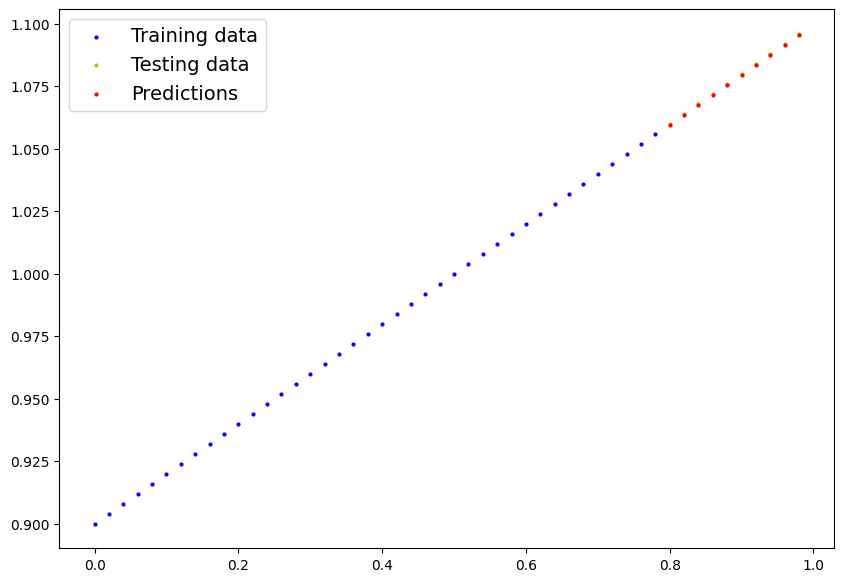

In [ ]:
plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                    predictions=y_preds_new.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

#Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "O1_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/O1_pytorch_workflow_model_1.pth')

In [ ]:
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(f=MODEL_SAVE_PATH,obj=model_1.state_dict())

Saving model to: models/O1_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2004]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8991], device='cuda:0'))])

In [ ]:
#Load a PyTorch

#Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

#Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
device

'cuda'

In [ ]:
!nvidia-smi

Sat Aug 19 11:18:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    29W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Exercises & Extra-curriculum

They are here: https://learnpytorch.io/01_pytorch_workflow/